In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
# Autograd (automatic differentiation) is the pytorch module that performs gradient tracking and computation
# By default, when tensors are created their gradients is not tracked
x = torch.ones(1, 10)
print(x.requires_grad)

# You can change it using the requires_grad_() function
x.requires_grad_()
print(x.requires_grad)

# Alternatively, when creating a tensor, you can directly set 'requires_grad=True'
x = torch.ones(1, 10, requires_grad=True)
print(x.requires_grad)

False
True
True


In [3]:
# If you create a tensor y from x as the result of an operation, it will have a gradient function (grad_fn) which is specific to this operation
y = x + 50
print(y.grad_fn)

y = x * 50
print(y.grad_fn)

y = x.mean()
print(y.grad_fn)

In [4]:
# Backward: computes the gradients 
x = torch.ones(1, 10, requires_grad=True)
y = x.mean()
y.backward()
print(x.grad)

tensor([[0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
         0.1000]])


/home/claesia/.local/lib/python3.6/site-packages/torch/autograd/__init__.py:132: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  allow_unreachable=True)  # allow_unreachable flag


In [5]:
# Sometimes (for instance at testing), you don't need to keep tracking of the gradients for some operations
# Then, in order to save memory you can simply deactivate gradient tracking
y = x.mean()
print(y.requires_grad)

with torch.no_grad():
    y = x.mean()
    print(y.requires_grad)

True
False


In [8]:
# TO DO: define a simple operation Y=W*X+B (with X=1, W=2 and B=3)
# Compute and print the gradients of X, W and B
X = torch.tensor(1.0, requires_grad=True)
W = torch.tensor(2.0, requires_grad=True)
B = torch.tensor(3.0, requires_grad=True)
Y = W*X+B
Y.backward()
print(X.grad)
print(W.grad)
print(B.grad)

tensor(2.)
tensor(1.)
tensor(1.)


In [9]:
# Example of creating a simple network, computing the output and the gradients

# Define the network (one linear layer and a nonlinearity)
linear_layer = nn.Linear(256, 2)
activation_fn = nn.Sigmoid()
print('Input size: ', linear_layer.in_features)
print('Output size: ', linear_layer.out_features)
print(linear_layer.bias)
print(linear_layer.weight.shape)

Input size:  256
Output size:  2
Parameter containing:
tensor([-0.0279, -0.0232], requires_grad=True)
torch.Size([2, 256])


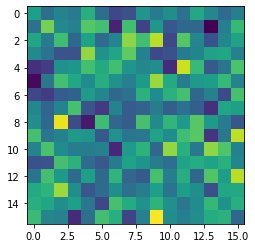

tensor([0., 1.])


In [10]:
# Create an image-like input and an arbitrary output
input_image = torch.randn(16,16)
plt.imshow(input_image.numpy())
plt.show()

output_true = torch.tensor([0, 1], dtype=torch.float)
print(output_true)

In [11]:
# forward pass
input_reshape = input_image.reshape(256) # vectorize the input image
output_predicted = activation_fn(linear_layer(input_reshape))
print(output_predicted)

tensor([0.4304, 0.4524], grad_fn=<SigmoidBackward>)


In [12]:
# Now, we need to define a loss function to measure the difference between the 'true' and 'predicted' output
# This loss function will be use to compute the gradients and update the network parameters

# Use the binary cross entropy loss function
loss_fn = nn.BCELoss() 

# calculate the loss with the given values (true and predicted)
loss = loss_fn(output_predicted, output_true)

# You can print the loss value (or store it, which is useful for monitoring the training) how far away is from the true value
print(loss.item())

# Compute the gradients
loss.backward()

print ('Weight gradient: ', linear_layer.weight.grad)
print ('Biases gradient: ', linear_layer.bias.grad)

0.6779987812042236
Weight gradient:  tensor([[ 0.0885, -0.1278, -0.0305, -0.0732,  0.1597, -0.1300, -0.2822, -0.2460,
          0.0445, -0.0788,  0.0152, -0.1085,  0.1295, -0.0176, -0.1400, -0.0520,
         -0.1086,  0.3367, -0.0091, -0.0473,  0.2723,  0.2367, -0.4065,  0.2305,
         -0.3014,  0.0548, -0.2234, -0.1533, -0.1546, -0.5120, -0.0531,  0.1999,
          0.1135, -0.0754,  0.2271, -0.1550,  0.1021, -0.1378, -0.0245,  0.3683,
          0.2308,  0.4419, -0.2801,  0.2730, -0.0179, -0.2432, -0.0216,  0.1033,
         -0.0015, -0.1080, -0.2376, -0.2375,  0.3810,  0.0369,  0.1134,  0.2952,
         -0.0441, -0.2768, -0.2434, -0.0716, -0.0300,  0.1023,  0.1207, -0.0487,
         -0.3626, -0.3222,  0.0369,  0.0478,  0.2344,  0.1412,  0.2328,  0.0494,
         -0.0202,  0.0152, -0.3819,  0.4731,  0.2088, -0.2133, -0.1032,  0.2511,
         -0.4834, -0.0913,  0.2355,  0.1249,  0.0039,  0.1499,  0.0317, -0.0488,
          0.0678,  0.3935,  0.1404, -0.0622,  0.0641,  0.0823,  0.2014, 

In [17]:
# To update the network parameters, we need to use an 'optimizer': it basically defines which optimization algorithm is used

# Let's use the stochastic gradient algorithm
optimizer = torch.optim.SGD(linear_layer.parameters(), lr=0.01)

# and apply it to update the parameters
optimizer.step()

In [14]:
# Save and load the linear layer of the model
torch.save(linear_layer, 'fnn_model.pt')
model = torch.load('fnn_model.pt')
model
print(model.bias)

Parameter containing:
tensor([-0.0301, -0.0204], requires_grad=True)


In [15]:
# Save and load only the model's parameters (recommended)
torch.save(linear_layer.state_dict(), 'fnn_model_params.pt')
model = nn.Linear(256, 2) #need to first instanciate the model
model.load_state_dict(torch.load('fnn_model_params.pt')) #now load its parameters
print(model.bias)

Parameter containing:
tensor([-0.0301, -0.0204], requires_grad=True)
